In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Ignorer les méssages d'avertissements
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

# Reading and exploring Data 

In [13]:
# path\\data.csv you should add where you load your data.csv file 
data = pd.read_csv('path\\data.csv')

In [14]:
data.shape #Database Format (number of variables and number of individuals)

(1200, 10)

In [15]:
data.head(1200) # Display of the first 5 records features

,mfcc1,mfcc2,rms,mean,beat,tempo,centroid,zcr,rolloff,TYPE
0,26734.926387,53078.300791,44.732809,-7.483912,41400.000000,18457.031250,3536.414293,9551,5875.750455,angry
1,28760.761555,57267.370759,62.302683,-7.831485,18000.000000,9228.515625,3006.155439,8291,5078.759766,angry
2,26468.860924,54801.163584,59.109714,-7.958513,13000.000000,7177.734375,3958.518126,12479,6158.617067,angry
3,29306.447530,59361.867819,43.720558,-7.746242,15000.000000,6983.741554,3550.417452,11400,5929.400572,angry
4,23153.675964,45159.496850,45.984142,-7.434400,21000.000000,12919.921875,2775.687228,5580,4747.343816,angry
...,...,...,...,...,...,...,...,...,...,...
1195,24874.067045,49116.277265,22.844363,-7.575690,32666.666667,12919.921875,3276.268225,8755,5357.326355,surprised
1196,26993.299014,51453.917599,29.067071,-7.367657,15000.000000,10766.601562,2871.647413,7054,4907.754259,surprised
1197,29177.296004,56734.128420,33.219069,-6.958796,26500.000000,9570.312500,3579.156293,13162,5703.253729,surprised
1198,24886.618950,46398.538959,36.649838,-6.984390,27333.333333,10766.601562,2994.826670,7442,5011.503462,surprised


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mfcc1     1200 non-null   float64
 1   mfcc2     1200 non-null   float64
 2   rms       1200 non-null   float64
 3   mean      1200 non-null   float64
 4   beat      1200 non-null   float64
 5   tempo     1200 non-null   float64
 6   centroid  1200 non-null   float64
 7   zcr       1200 non-null   int64  
 8   rolloff   1200 non-null   float64
 9   TYPE      1200 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 93.9+ KB


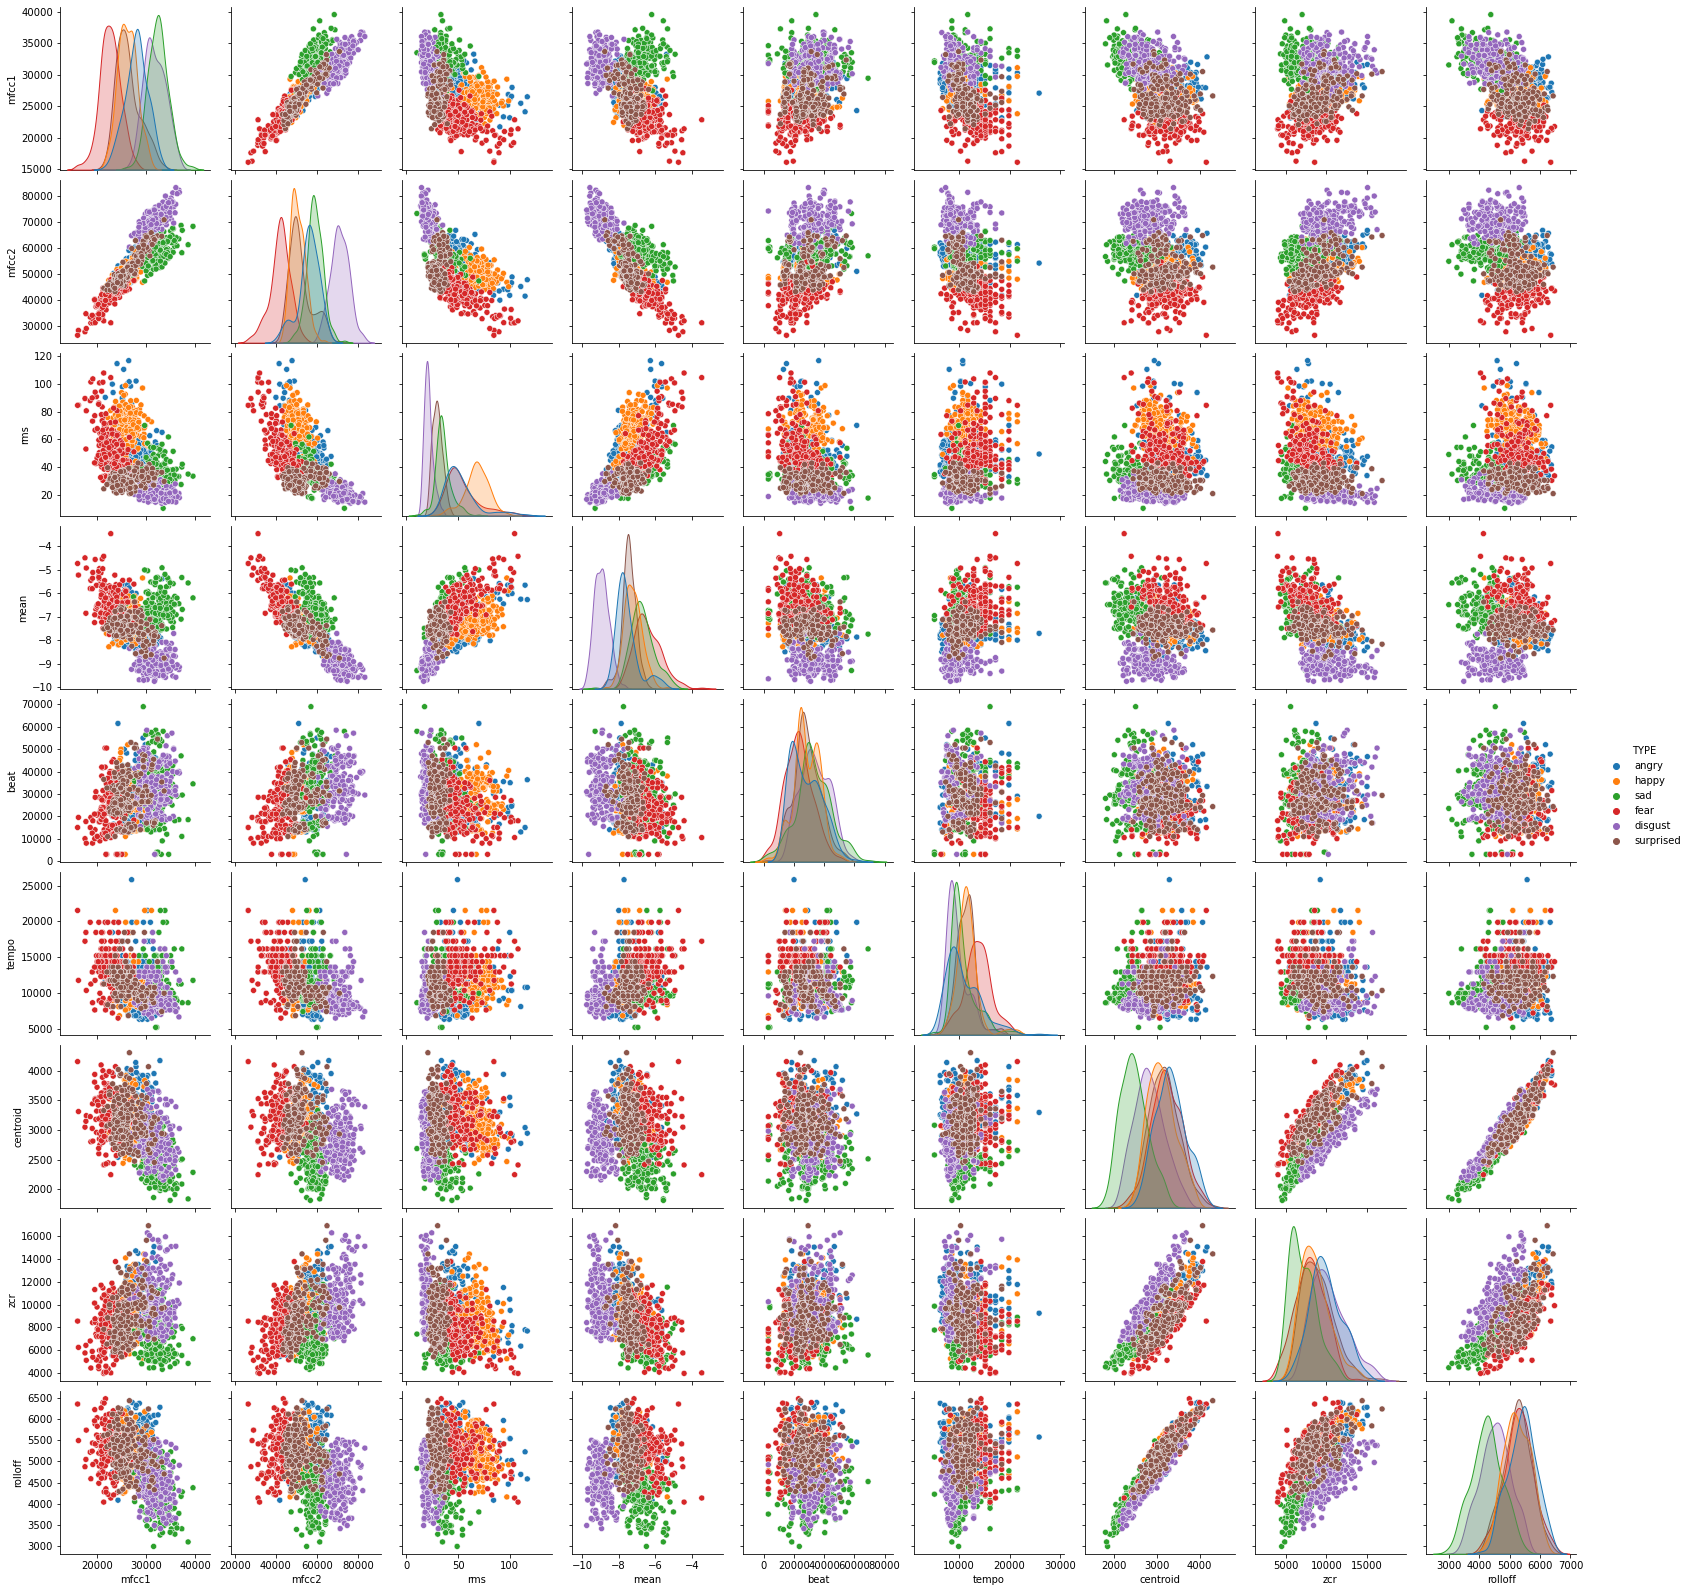

In [17]:
sns.pairplot(data,hue="TYPE",diag_kind = 'kde')
plt.show()
# the points will be colored according to the class (#hue="Classe")

In [19]:
# Correlation matrix
Mat_Corr = data.corr()
Mat_Corr

,mfcc1,mfcc2,rms,mean,beat,tempo,centroid,zcr,rolloff
mfcc1,1.000000,0.869571,-0.481165,-0.378532,0.307234,-0.384983,-0.482420,0.141533,-0.552442
mfcc2,0.869571,1.000000,-0.619134,-0.766051,0.347599,-0.418978,-0.261630,0.405639,-0.367497
rms,-0.481165,-0.619134,1.000000,0.577483,-0.240490,0.209230,0.137657,-0.234828,0.214656
mean,-0.378532,-0.766051,0.577483,1.000000,-0.248085,0.308926,-0.071239,-0.498613,0.026440
beat,0.307234,0.347599,-0.240490,-0.248085,1.000000,0.021162,-0.103451,0.110541,-0.109127
tempo,-0.384983,-0.418978,0.209230,0.308926,0.021162,1.000000,0.174865,-0.096465,0.201961
centroid,-0.482420,-0.261630,0.137657,-0.071239,-0.103451,0.174865,1.000000,0.729809,0.945855
zcr,0.141533,0.405639,-0.234828,-0.498613,0.110541,-0.096465,0.729809,1.000000,0.571955
rolloff,-0.552442,-0.367497,0.214656,0.026440,-0.109127,0.201961,0.945855,0.571955,1.000000


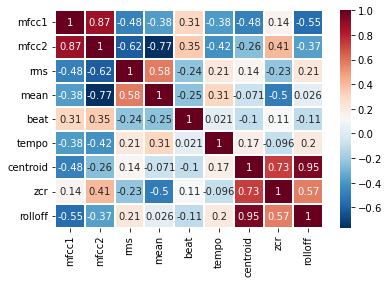

In [20]:
sns.heatmap(Mat_Corr, 
            xticklabels=Mat_Corr.columns,
            yticklabels=Mat_Corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.2);

## Choice of input variables and output variable 

In [21]:
# input variables 
X = data[['mfcc1','mfcc2','mean','centroid','zcr','rolloff','rms']]
# we won't use beat and tempo features because it have bad correlation with other features "look the heatmap above"
# output variables 
y = data[['TYPE']]

In [22]:
X.head()

,mfcc1,mfcc2,mean,centroid,zcr,rolloff,rms
0,26734.926387,53078.300791,-7.483912,3536.414293,9551,5875.750455,44.732809
1,28760.761555,57267.370759,-7.831485,3006.155439,8291,5078.759766,62.302683
2,26468.860924,54801.163584,-7.958513,3958.518126,12479,6158.617067,59.109714
3,29306.447530,59361.867819,-7.746242,3550.417452,11400,5929.400572,43.720558
4,23153.675964,45159.496850,-7.434400,2775.687228,5580,4747.343816,45.984142


In [23]:
y.head()

,TYPE
0,angry
1,angry
2,angry
3,angry
4,angry


## Preparing DATA 75% Train and 25% Test

In [28]:
from sklearn import model_selection 
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train , y_test = model_selection.train_test_split (X, y, test_size=0.25,random_state=42) 

In [31]:
print('X train :\n ',X_train.shape)
print('y train :\n ',y_train.shape)
print('X test :\n ',X_test.shape)
print('y test :\n ',y_test.shape)

X train :
  (900, 7)
y train :
  (900, 1)
X test :
  (300, 7)
y test :
  (300, 1)


## Import classification models

In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Creation classification models

In [38]:
lr = LogisticRegression() 

In [39]:
crt = DecisionTreeClassifier(criterion='gini') # Model CRT decision tree

In [40]:
c5 = DecisionTreeClassifier(criterion='entropy') # Model C5 decision tree

In [41]:
rf = RandomForestClassifier(n_estimators=500) # Model Random Forest(CRT) , 500 decision tree (100 the default value)

In [42]:
rfc5 = RandomForestClassifier(n_estimators=500,criterion='entropy') # Modéle Random Forest(C5) , 500 arbre de décision (100 est la val par défaut)

## Training the models

In [43]:
lr.fit(X_train, y_train);
crt.fit(X_train, y_train);
c5.fit(X_train, y_train);
rf.fit(X_train, y_train);
rfc5.fit(X_train, y_train);

## Analysis of the quality of the models developed 

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [46]:
y_predlr = lr.predict(X_test)
y_predcrt = crt.predict(X_test)
y_predc5 = c5.predict(X_test)
y_predrf = rf.predict(X_test) #crt
y_predrfc5 = rfc5.predict(X_test) #c5

In [47]:
confusion_matrix(y_test,y_predlr)

array([[21,  1,  5,  6,  2, 14],
       [ 1, 52,  0,  0,  1,  0],
       [ 0,  0, 46,  2,  0,  1],
       [ 7,  0, 12, 19,  3, 15],
       [ 2,  0,  0,  0, 45,  0],
       [13,  1,  9, 13,  2,  7]], dtype=int64)

In [48]:
confusion_matrix(y_test,y_predcrt)

array([[34,  0,  1,  9,  0,  5],
       [ 0, 50,  0,  0,  1,  3],
       [ 3,  0, 37,  1,  0,  8],
       [13,  0,  1, 42,  0,  0],
       [ 0,  0,  0,  1, 45,  1],
       [ 5,  2,  1,  0,  2, 35]], dtype=int64)

In [49]:
confusion_matrix(y_test,y_predc5)

array([[34,  0,  0, 10,  0,  5],
       [ 0, 54,  0,  0,  0,  0],
       [ 1,  0, 40,  1,  0,  7],
       [11,  0,  2, 43,  0,  0],
       [ 1,  0,  0,  0, 42,  4],
       [ 2,  1,  0,  0,  7, 35]], dtype=int64)

In [50]:
confusion_matrix(y_test,y_predrf)

array([[42,  0,  2,  4,  0,  1],
       [ 0, 52,  0,  0,  0,  2],
       [ 0,  0, 43,  0,  0,  6],
       [ 8,  0,  2, 46,  0,  0],
       [ 0,  0,  0,  0, 47,  0],
       [ 2,  1,  1,  0,  1, 40]], dtype=int64)

In [51]:
confusion_matrix(y_test,y_predrfc5)

array([[43,  0,  2,  4,  0,  0],
       [ 0, 52,  0,  0,  0,  2],
       [ 0,  0, 43,  0,  0,  6],
       [ 8,  0,  2, 46,  0,  0],
       [ 0,  0,  0,  0, 47,  0],
       [ 3,  0,  1,  0,  1, 40]], dtype=int64)

## Calcul l'accuracy des modéles devloppés

In [52]:
print ('Accuracy Model Regresion Logistique:',metrics.accuracy_score(y_test, y_predlr))
print ('Accuracy Model CRT:',metrics.accuracy_score(y_test, y_predcrt))
print ('Accuracy Model C5:',metrics.accuracy_score(y_test, y_predc5))
print ('Accuracy Model Random Forest(crt):',metrics.accuracy_score(y_test, y_predrf))
print ('Accuracy Model Random Forest(c5):',metrics.accuracy_score(y_test, y_predrfc5))

Accuracy Model Regresion Logistique: 0.6333333333333333
Accuracy Model CRT: 0.81
Accuracy Model C5: 0.8266666666666667
Accuracy Model Random Forest(crt): 0.9
Accuracy Model Random Forest(c5): 0.9033333333333333


In [53]:
#Rapport detailé de la qualité des modéle developés
print('Rapport de la qualité du modèle Regression logistique')
print('=================================================')
print(classification_report(y_test,y_predlr))
print('Rapport de la qualité du modèle CRT')
print('=================================================')
print(classification_report(y_test,y_predcrt))
print('Rapport de la qualité du modèle C5')
print('=================================================')
print(classification_report(y_test,y_predc5))
print('Rapport de la qualité du modèle RF (crt)')
print('=================================================')
print(classification_report(y_test,y_predrf))
print('Rapport de la qualité du modèle RF (c5) ')
print('=================================================')
print(classification_report(y_test,y_predrfc5))


Rapport de la qualité du modèle Regression logistique
              precision    recall  f1-score   support

       angry       0.48      0.43      0.45        49
     disgust       0.96      0.96      0.96        54
        fear       0.64      0.94      0.76        49
       happy       0.47      0.34      0.40        56
         sad       0.85      0.96      0.90        47
   surprised       0.19      0.16      0.17        45

    accuracy                           0.63       300
   macro avg       0.60      0.63      0.61       300
weighted avg       0.61      0.63      0.61       300

Rapport de la qualité du modèle CRT
              precision    recall  f1-score   support

       angry       0.62      0.69      0.65        49
     disgust       0.96      0.93      0.94        54
        fear       0.93      0.76      0.83        49
       happy       0.79      0.75      0.77        56
         sad       0.94      0.96      0.95        47
   surprised       0.67      0.78      0.7

# Cross-validation

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

### accuracy

In [56]:
accuracylr = cross_val_score(lr, X, y, cv=25)
accuracycrt = cross_val_score(crt, X, y, cv=25)
accuracyc5 = cross_val_score(c5, X, y, cv=25)
accuracyrf = cross_val_score(rf, X, y, cv=25)
accuracyrfc5 = cross_val_score(rfc5, X, y, cv=25)

In [57]:
#print(accuracylr)
print("accuracy du modèle RL :", accuracylr.mean())
#print(accuracycrt)
print("accuracy du modèle CRT :", accuracycrt.mean())
#print(accuracyc5)
print("accuracy du modèle C5 :", accuracyc5.mean())
#print(accuracyrf)
print("accuracy du modèle RF(CRT) :", accuracyrf.mean())
#print(accuracyrfc5)
print("accuracy du modèle RF(C5) :", accuracyrfc5.mean())


accuracy du modèle RL : 0.6433333333333333
accuracy du modèle CRT : 0.8258333333333333
accuracy du modèle C5 : 0.8208333333333334
accuracy du modèle RF(CRT) : 0.8891666666666665
accuracy du modèle RF(C5) : 0.8841666666666665


### F1_Score

In [58]:
F1Scorelr = cross_val_score(lr, X, y, cv=10,scoring="f1_macro")
F1Scorecrt = cross_val_score(crt, X, y, cv=10,scoring="f1_macro")
F1Scorec5 = cross_val_score(c5, X, y, cv=10,scoring="f1_macro")
F1Scorerf = cross_val_score(rf, X, y, cv=10,scoring="f1_macro")
F1Scorerfc5 = cross_val_score(rfc5, X, y, cv=10,scoring="f1_macro")

In [59]:
print("F1-Score du modèle RL :", F1Scorelr.mean())
print("F1-Score du modèle CRT :", F1Scorecrt.mean())
print("F1-Score du modèle C5 :", F1Scorec5.mean())
print("F1-Score du modèle RF(CRT) :", F1Scorerf.mean())
print("F1-Score du modèle RF(C5) :", F1Scorerfc5.mean())

F1-Score du modèle RL : 0.6266239795504338
F1-Score du modèle CRT : 0.8149848127961035
F1-Score du modèle C5 : 0.8104744985453742
F1-Score du modèle RF(CRT) : 0.879213932090438
F1-Score du modèle RF(C5) : 0.8758904505602476
